## Introduction

In [118]:
!pygmentize helper_scripts/lda.py

from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class LDA:
    def __init__(self, texts):
        self.texts = texts
        self.docs = [data.split() for data in texts]
        self.dictionary = corpora.Dictionary(self.docs)
        self.bow_corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]

    def __iter__(self):
        self.length = len(self.texts)
        self.n = 0
        return self

    def __next__(self):
        token = self.bow_corpus[self.n]
        self.n += 1
        if self.n == self.length:
            self.n == 1
        return [(self.dictionary[ii], freq) for ii, freq in token]

    def filter_extremes(self, keep_n, no_below, no_above):
        self.dictionary.filter_extremes(
            keep_n=keep_n, no_below=no_below, no_above=no_above
        )
        self.bow_corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]

    def fit(
        self,
  

In [ ]:
%load_ext autoreload
%autoreload 2

from helper_scripts.lda import LDA
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setup before git push, DO NOT RUN THIS CELL IF YOU ARE NOT USING GOOGLE COLAB
'''
Change the default plotly renderer to colab 
because plotly's plot doesn't render on the 
internet outside of certain Python environments
'''
import plotly.io as pio
pio.renderers.default = 'colab'
# Rerun all cells with plotly plots after running this cell (before git commit)

## Reading The Data

In [7]:
df = pd.read_parquet('../cleaned_data/cleaned_reviews.parquet.gzip')
df.head()

,title,date,location,rating,text,title_clean,text_clean
0,"Which iPhone you should Purchase ? iPhone 8, X...",2018-12-12,India,3.0,NOTE:@ This is detailed comparison between iPh...,purchas 8 x xs,note detail comparison 8 x xs use month also s...
1,Don't buy iPhone xr from Amazon.,2018-11-17,India,1.0,Very bad experience with this iPhone xr phone....,buy,bad experi back camera find defect non functio...
2,Happy with the purchase,2019-01-27,India,5.0,Amazing phone with amazing camera coming from ...,happi purchas,amaz amaz camera come 7 plus great servic
3,Amazon is not an apple authorised reseller. Pl...,2019-05-02,India,1.0,So I got the iPhone XR just today. The product...,authoris resel pleas take note,get today product look amaz unfortun face id w...
4,Excellent Battery life and buttery smooth UI,2019-05-24,India,5.0,I've been an android user all my life until I ...,excel batteri life butteri smooth ui,android user life decid tri io love camera bat...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        3870 non-null   object        
 1   date         3870 non-null   datetime64[ns]
 2   location     3870 non-null   object        
 3   rating       3870 non-null   float32       
 4   text         3870 non-null   object        
 5   title_clean  3870 non-null   object        
 6   text_clean   3870 non-null   object        
dtypes: datetime64[ns](1), float32(1), object(5)
memory usage: 196.6+ KB


## LDA

### Initializing the model

In [97]:
lda_model = LDA(df['text_clean'])
lda_model.filter_extremes(keep_n=10000, no_below=10, no_above = 0.2)
# sanity check on dictionary size
len(lda_model.dictionary)

624

In [98]:
# sanity check on data
it = iter(lda_model)
it = next(it)
it.insert(0, ('word', 'frequency'))
it[:30]

[('word', 'frequency'),
 ('1', 1),
 ('11', 1),
 ('12', 1),
 ('15', 1),
 ('20', 1),
 ('4', 2),
 ('4k', 1),
 ('5', 1),
 ('6', 2),
 ('64gb', 1),
 ('6s', 1),
 ('7', 2),
 ('8', 19),
 ('9', 1),
 ('almost', 2),
 ('alreadi', 1),
 ('also', 3),
 ('alway', 1),
 ('back', 1),
 ('batteri', 4),
 ('best', 3),
 ('better', 5),
 ('budget', 2),
 ('build', 1),
 ('button', 1),
 ('camera', 3),
 ('charg', 2),
 ('choic', 2),
 ('colour', 1)]

### Training the model

In [99]:
lda_model.fit(5)
## Evaluate the model
lda_model.print_output()

Topic: 0	Coherence Score: 0.4781
Words: 0.039*"best" + 0.018*"batteri" + 0.017*"super" + 0.016*"use" + 0.015*"camera" + 0.015*"charg" + 0.014*"awesom" + 0.014*"buy" + 0.013*"product" + 0.013*"it"

########

Topic: 1	Coherence Score: 0.5928
Words: 0.029*"batteri" + 0.024*"best" + 0.023*"use" + 0.022*"face" + 0.020*"one" + 0.015*"life" + 0.013*"camera" + 0.013*"ever" + 0.013*"perform" + 0.012*"product"

########

Topic: 2	Coherence Score: 0.4107
Words: 0.064*"awesom" + 0.031*"money" + 0.022*"valu" + 0.020*"use" + 0.018*"batteri" + 0.015*"product" + 0.014*"camera" + 0.014*"worth" + 0.013*"go" + 0.012*"overal"

########

Topic: 3	Coherence Score: 0.3928
Words: 0.088*"product" + 0.055*"batteri" + 0.052*"nice" + 0.043*"camera" + 0.038*"great" + 0.037*"life" + 0.033*"qualiti" + 0.032*"amaz" + 0.028*"excel" + 0.024*"love"

########

Topic: 4	Coherence Score: 0.5986
Words: 0.025*"get" + 0.021*"camera" + 0.015*"use" + 0.015*"price" + 0.014*"android" + 0.013*"excel" + 0.013*"work" + 0.011*"batter

### Visualizing training results

In [100]:
lda_model.visualize_topics_

### Hyperparameter tuning

tuning: 100%|██████████| 59/59 [12:00<00:00, 12.22s/it, max_coherence_score=0.505, best_params={'num_topics': 6, 'alpha': 'symmetric', 'beta': 'symmetric'}]


Finished hyperparameter tuning, model updated!


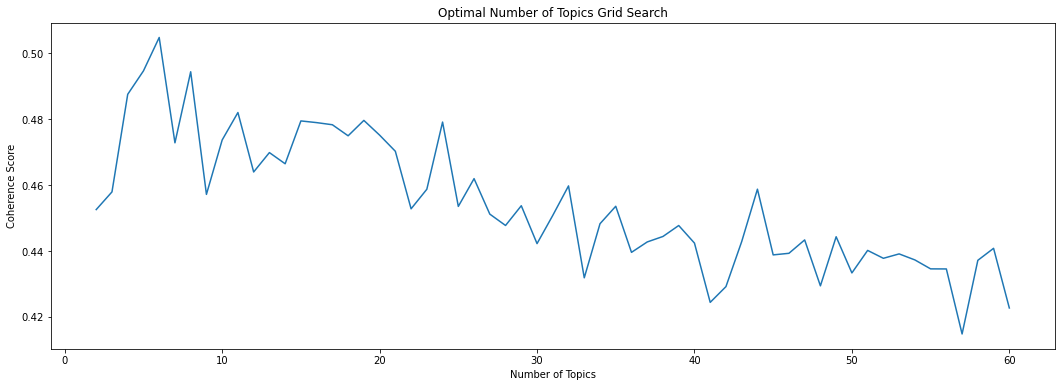

In [112]:
lda_model.find_best_num_topics()

In [124]:
lda_model.print_output()

Topic: 0	Coherence Score: 0.5011
Words: 0.032*"best" + 0.018*"charg" + 0.017*"super" + 0.016*"it" + 0.016*"use" + 0.015*"awesom" + 0.014*"work" + 0.014*"batteri" + 0.014*"camera" + 0.013*"get"

########

Topic: 1	Coherence Score: 0.6416
Words: 0.048*"best" + 0.031*"batteri" + 0.026*"use" + 0.025*"one" + 0.022*"face" + 0.017*"ever" + 0.016*"life" + 0.014*"camera" + 0.012*"buy" + 0.012*"perform"

########

Topic: 2	Coherence Score: 0.4473
Words: 0.077*"awesom" + 0.036*"money" + 0.028*"use" + 0.026*"valu" + 0.020*"product" + 0.015*"batteri" + 0.015*"camera" + 0.014*"love" + 0.013*"worth" + 0.013*"back"

########

Topic: 3	Coherence Score: 0.3679
Words: 0.102*"product" + 0.067*"nice" + 0.058*"batteri" + 0.045*"camera" + 0.042*"life" + 0.039*"amaz" + 0.032*"qualiti" + 0.030*"excel" + 0.025*"love" + 0.021*"mobil"

########

Topic: 4	Coherence Score: 0.5712
Words: 0.026*"get" + 0.019*"camera" + 0.018*"use" + 0.015*"excel" + 0.015*"work" + 0.014*"android" + 0.011*"screen" + 0.010*"batteri" + 0

In [113]:
best_k = lda_model.best_params_["num_topics"]

lda_model.tune(num_topic_range=range(best_k -2, best_k + 3, 1))

tuning: 100%|██████████| 210/210 [25:22<00:00,  7.25s/it, max_coherence_score=0.543, best_params={'num_topics': 6, 'alpha': 'asymmetric', 'beta': 0.75}]


Finished hyperparameter tuning, model updated!


In [125]:
lda_model.print_output()

Topic: 0	Coherence Score: 0.4777
Words: 0.037*"awesom" + 0.034*"best" + 0.033*"product" + 0.026*"camera" + 0.023*"batteri" + 0.023*"excel" + 0.016*"qualiti" + 0.015*"life" + 0.014*"buy" + 0.013*"money"

########

Topic: 1	Coherence Score: 0.6566
Words: 0.041*"batteri" + 0.024*"life" + 0.023*"face" + 0.022*"one" + 0.020*"use" + 0.019*"best" + 0.017*"camera" + 0.014*"perform" + 0.013*"like" + 0.012*"qualiti"

########

Topic: 2	Coherence Score: 0.5576
Words: 0.024*"use" + 0.016*"batteri" + 0.014*"back" + 0.011*"product" + 0.011*"camera" + 0.010*"go" + 0.010*"day" + 0.010*"get" + 0.009*"devic" + 0.009*"amaz"

########

Topic: 3	Coherence Score: 0.3425
Words: 0.103*"product" + 0.094*"nice" + 0.038*"amaz" + 0.035*"love" + 0.028*"batteri" + 0.024*"camera" + 0.021*"mobil" + 0.020*"life" + 0.018*"qualiti" + 0.012*"buy"

########

Topic: 4	Coherence Score: 0.6748
Words: 0.021*"get" + 0.020*"use" + 0.017*"android" + 0.016*"camera" + 0.013*"screen" + 0.011*"work" + 0.011*"io" + 0.009*"day" + 0.00

In [117]:
best_k = lda_model.best_params_["num_topics"]
alpha_range = list(np.arange(0.0, 1.1, 0.1))
alpha_range.append("symmetric")
alpha_range.append("asymmetric")
beta_range = list(np.arange(0.55, 1.01, 0.05))
beta_range.append("symmetric")

lda_model.tune(num_topic_range=range(best_k -1, best_k + 2, 1), alpha_range=alpha_range, beta_range=beta_range)

tuning: 100%|██████████| 429/429 [58:40<00:00,  8.21s/it, max_coherence_score=0.549, best_params={'num_topics': 6, 'alpha': 'asymmetric', 'beta': 0.8500000000000003}]


Finished hyperparameter tuning, model updated!


In [126]:
lda_model.fit(**lda_model.best_params_)

lda_model.print_output()

Topic: 0	Coherence Score: 0.4667
Words: 0.037*"awesom" + 0.034*"best" + 0.033*"product" + 0.026*"camera" + 0.024*"batteri" + 0.023*"excel" + 0.017*"qualiti" + 0.015*"life" + 0.014*"buy" + 0.013*"money"

########

Topic: 1	Coherence Score: 0.6569
Words: 0.040*"batteri" + 0.024*"life" + 0.022*"face" + 0.022*"one" + 0.020*"use" + 0.019*"best" + 0.017*"camera" + 0.014*"perform" + 0.014*"like" + 0.012*"qualiti"

########

Topic: 2	Coherence Score: 0.5579
Words: 0.023*"use" + 0.015*"batteri" + 0.014*"back" + 0.011*"product" + 0.011*"camera" + 0.010*"go" + 0.010*"day" + 0.010*"get" + 0.010*"overal" + 0.009*"devic"

########

Topic: 3	Coherence Score: 0.3744
Words: 0.100*"product" + 0.092*"nice" + 0.036*"amaz" + 0.034*"love" + 0.027*"batteri" + 0.022*"camera" + 0.021*"mobil" + 0.018*"life" + 0.017*"qualiti" + 0.011*"buy"

########

Topic: 4	Coherence Score: 0.6898
Words: 0.021*"get" + 0.020*"use" + 0.016*"android" + 0.016*"camera" + 0.013*"screen" + 0.011*"work" + 0.011*"io" + 0.009*"day" + 0.

In [127]:
lda_model.visualize_topics_